In [1]:
%matplotlib notebook

from neuron import h, gui
from neuron.units import ms, mV


In [2]:
class L5PCbiophys:
    def biophys(self, cell):
        for sec in cell.all:
            sec.insert('pas')
            sec.cm = 1
            sec.Ra = 100
            sec.e_pas = -90

        for sec in cell.somatic:
            sec.insert('Ca_LVAst')
            sec.insert('Ca_HVA')
            sec.insert('SKv3_1')
            sec.insert('SK_E2')
            sec.insert('K_Tst')
            sec.insert('K_Pst')
            sec.insert('Nap_Et2')
            sec.insert('NaTa_t')
            sec.insert('CaDynamics_E2')
            sec.insert('Ih')

            sec.ek = -85
            sec.ena = 50
            sec.gIhbar_Ih = 0.0002
            sec.g_pas = 0.0000338
            sec.decay_CaDynamics_E2 = 460.0
            sec.gamma_CaDynamics_E2 = 0.000501
            sec.gCa_LVAstbar_Ca_LVAst = 0.00343
            sec.gCa_HVAbar_Ca_HVA = 0.000992
            sec.gSKv3_1bar_SKv3_1 = 0.693
            sec.gSK_E2bar_SK_E2 = 0.0441
            sec.gK_Tstbar_K_Tst = 0.0812
            sec.gK_Pstbar_K_Pst = 0.00223
            sec.gNap_Et2bar_Nap_Et2 = 0.00172
            sec.gNaTa_tbar_NaTa_t = 2.04

        for sec in cell.apical:
            sec.cm = 2
            sec.insert('Ih')
            sec.insert('SK_E2')
            sec.insert('Ca_LVAst')
            sec.insert('Ca_HVA')
            sec.insert('SKv3_1')
            sec.insert('NaTa_t')
            sec.insert('Im')
            sec.insert('CaDynamics_E2')

            sec.ek = -85
            sec.ena = 50
            sec.decay_CaDynamics_E2 = 122
            sec.gamma_CaDynamics_E2 = 0.000509
            sec.gSK_E2bar_SK_E2 = 0.0012
            sec.gSKv3_1bar_SKv3_1 = 0.000261
            sec.gNaTa_tbar_NaTa_t = 0.0213
            sec.gImbar_Im = 0.0000675
            sec.g_pas = 0.0000589

        # Distribute channels for apical sections
        cell.distribute_channels("apical", "gIhbar_Ih", 2, -0.8696, 3.6161, 0.0, 2.0870, 0.00020000000)
        cell.distribute_channels("apical", "gCa_LVAstbar_Ca_LVAst", 3, 1.000000, 0.010000, 685.000000, 885.000000, 0.0187000000)
        cell.distribute_channels("apical", "gCa_HVAbar_Ca_HVA", 3, 1.000000, 0.100000, 685.000000, 885.000000, 0.0005550000)

        for sec in cell.basal:
            sec.cm = 2
            sec.insert('Ih')
            sec.gIhbar_Ih = 0.0002
            sec.g_pas = 0.0000467

        for sec in cell.axonal:
            sec.g_pas = 0.0000325

In [3]:
class L5PCtemplate:
    def __init__(self, morphology_file):
        self.all = h.SectionList()
        self.somatic = h.SectionList()
        self.basal = h.SectionList()
        self.apical = h.SectionList()
        self.axonal = h.SectionList()
        self.SecSyn = None
        self.this = h.SectionList()

        self.init(morphology_file)

    def init(self, morphology_file):
        # Load morphology using Import3d_Neurolucida3 and Import3d_GUI
        h.load_file('import3d.hoc')
        nl = h.Import3d_Neurolucida3()
        nl.quiet = 1
        nl.input(morphology_file)
        import_gui = h.Import3d_GUI(nl, 0)
        import_gui.instantiate(self.this)
        self.geom_nseg()
        self.biophys()

        # Fix diameters for sections with 0 diameter
        for sec in self.this.all:
            if sec.diam == 0:
                sec.diam = 1
                print(f"Error: Morphology problem with section [{sec.name()}] 0 diam")

    def geom(self):
        pass  # Fill in with appropriate geometry specifications

    def geom_nseg(self):
        soma_area = self.soma(0.5).area()
        nSec = 0

        for sec in self.this:
            sec.nseg = 1 + 2 * int(sec.L / 40)
            nSec += 1

        self.nSecAll = nSec
        self.nSecSoma = len(self.somatic)
        self.nSecApical = len(self.apical)
        self.nSecBasal = len(self.basal)
        self.nSecAxonalOrig = len(self.axonal)
        self.nSecAxonal = self.nSecAxonalOrig

    def biophys(self):
        bp = L5PCbiophys()
        bp.biophys(self.this)

    def delete_axon(self):
        for sec in self.axonal:
            sec = None

        # Create two new axon sections
        self.axon.append(h.Section(name="axon[0]"))
        self.axon[0].L = 30
        self.axon[0].diam = 1
        self.axon[0].nseg = 1 + 2 * int(self.axon[0].L / 40)
        self.all.append(self.axon[0])
        self.axonal.append(self.axon[0])

        self.axon.append(h.Section(name="axon[1]"))
        self.axon[1].L = 30
        self.axon[1].diam = 1
        self.axon[1].nseg = 1 + 2 * int(self.axon[1].L / 40)
        self.all.append(self.axon[1])
        self.axonal.append(self.axon[1])

        self.nSecAxonal = 2
        self.axon[0].connect(self.soma(0.5))
        self.axon[1].connect(self.axon[0](1))

    def distribute_channels(self, *args):
        # Fill in with channel distribution logic
        pass

    # ... (Copy the rest of the functions with necessary adaptations)

In [ ]:






# Main part of the script
if __name__ == "__main__":
    morphology_file = "morphologies/cell1.asc"
    cell = L5PCtemplate(morphology_file)

    # Create an instance of L5PCbiophys and apply biophysical properties to the entire cell
    biophys_properties = L5PCbiophys()
    biophys_properties.biophys(cell)
    



NEURON: Can't execute in a built-in class context
 near line 0
 ^
        Import3d_GUI[0].execute("~create so...", ...)
      Import3d_GUI[0].instantiate(...

In [6]:
pip install neuron

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install neuron.hoc

ERROR: Could not find a version that satisfies the requirement neuron.hoc (from versions: none)
ERROR: No matching distribution found for neuron.hoc
Note: you may need to restart the kernel to use updated packages.


In [14]:
import neuron

In [15]:
class Cell:
    def __init__(self, gid, x, y, z, theta):
        self._gid = gid
        self._morphology()
        self.all = self.soma.wholetree()
        self._biophysics()
        self.x = self.y = self.z = 0 
        h.define_shape()
        self._rotate_z(theta)
        self._set_position(x,y, z)
        
        # everything below here in this method is NEW
        self._spike_detector = h.NetCon(self.soma(0.5)._ref_v, None, sec=self.soma)
        self.spike_times = h.Vector()
        self._spike_detector.record(self.spike_times)
        
        self._ncs = []
        
        self.soma_v = h.Vector().record(self.soma(0.5)._ref_v)
        
    def __repr__(self):
        return '{}[{}]'.format(self.name, self._gid)
    
    def _set_position(self, x, y, z):
        for sec in self.all:
            for i in range(sec.n3d()):
                sec.pt3dchange(i,
                               x - self.x + sec.x3d(i),
                               y - self.y + sec.y3d(i),
                               z - self.z + sec.z3d(i),
                              sec.diam3d(i))
        self.x, self.y, self.z = x, y, z
        
    def _rotate_z(self, theta):
        """Rotate the cell about the Z axis."""
        for sec in self.all:
            for i in range(sec.n3d()):
                x = sec.x3d(i)
                y = sec.y3d(i)
                c = h.cos(theta)
                s = h.sin(theta)
                xprime = x * c - y * s
                yprime = x * s + y * c
                sec.pt3dchange(i, xprime, yprime, sec.z3d(i), sec.diam3d(i))


In [16]:
class BallAndStick(Cell):
    name = 'BallandStick'
    def _morphology(self):
        self.soma = h.Section(name='soma', cell=self)
        self.dend = h.Section(name='dend', cell=self)
        self.all = [self.soma, self.dend]
        self.dend.connect(self.soma)
        self.soma.L = self.soma.diam = 12.6157
        self.dend.L = 200
        self.dend.diam = 1
        
    def _biophysics(self):
        for sec in self.all: 
                sec.Ra  = 100 #axial resistance Ohm * cm
                sec.cm = 1 #membrane capacitance micro farads/cm^2
        
        #active currents
        self.soma.insert('hh') #applying hodgkin huxley biophysical constrains
        for seg in self.soma: 
            
            #S/cm^2
            seg.hh.gnabar = 0.12 #na conductance
            seg.hh.gkbar = 0.036 #k conductance
            seg.hh.gl = 0.003 #leak conductance
            
            seg.hh.el = -54.3 #reversal potential, mV
        
        #passive currrents
        self.dend.insert('pas')
        for seg in self.dend:
            seg.pas.g = 0.001
            seg.pas.e = -65
        
        self.syn = h.ExpSyn(self.dend(0.5))
        self.syn.tau = 2 * ms

In [17]:
def create_n_bs(n,r):
    '''n = number of cells, r = radius'''
    cells = []
    for i in range(n):
        theta = i*2*h.PI/n
        cells.append(BallAndStick(i, h.cos(theta)*r, h.sin(theta)*r, 0, theta))
    return cells

In [18]:
my_cells = create_n_bs(7, 50)

In [19]:
ps = h.PlotShape(True)
ps.show(0)

1.0

In [20]:
my_cells = create_n_bs(5, 50)


In [21]:
stim = h.NetStim()

syn_ = h.ExpSyn(my_cells[0].dend(0.5))

stim.number = 1
stim.start = 9
ncstim = h.NetCon(stim, syn_)
ncstim.delay = 1*ms
ncstim.weight[0] = 0.04 #netcon weight

syn_.tau = 2 * ms
print("Rev. potential = {} mV".format(syn_.e))

Rev. potential = 0.0 mV


In [22]:
recording_cell = my_cells[0]
soma_v = h.Vector().record(recording_cell.soma(0.5)._ref_v)
dend_v = h.Vector().record(recording_cell.dend(0.5)._ref_v)
t = h.Vector().record(h._ref_t)
h.finitialize(-65 * mV)
h.continuerun(25 * ms)

0.0

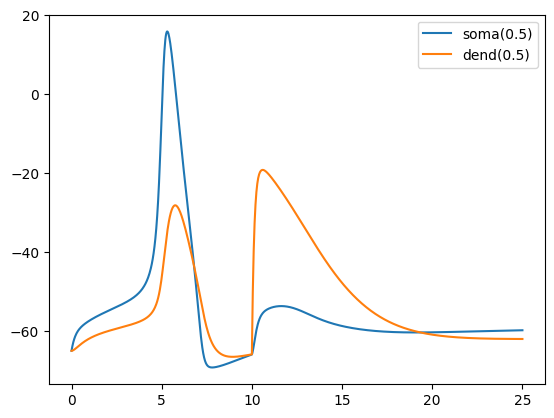

In [23]:
import matplotlib.pyplot as plt
plt.plot(t, soma_v, label='soma(0.5)')
plt.plot(t, dend_v, label='dend(0.5)')
plt.legend()
plt.show()


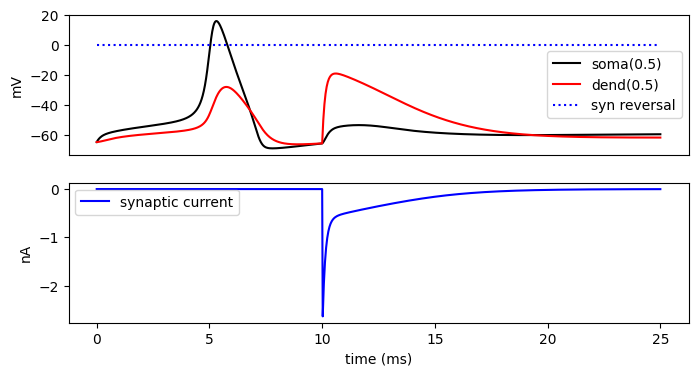

In [24]:
syn_i = h.Vector().record(syn_._ref_i)
h.finitialize(-65 * mV)
h.continuerun(25 * ms)

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(2, 1, 1)
soma_plot = ax1.plot(t, soma_v, color='black', label='soma(0.5)')
dend_plot = ax1.plot(t, dend_v, color='red', label='dend(0.5)')
rev_plot = ax1.plot([t[0], t[-1]], [syn_.e, syn_.e], label='syn reversal',
        color='blue', linestyle=':')
ax1.legend()
ax1.set_ylabel('mV')
ax1.set_xticks([]) # Use ax2's tick labels

ax2 = fig.add_subplot(2, 1, 2)
syn_plot = ax2.plot(t, syn_i, color='blue', label='synaptic current')
ax2.legend()
ax2.set_ylabel(h.units('ExpSyn.i'))
ax2.set_xlabel('time (ms)')
plt.show()

In [25]:
syns = []
netcons = []
for source, target in zip(my_cells, my_cells[1:] + [my_cells[0]]):
    syn = h.ExpSyn(target.dend(0.5))
    nc = h.NetCon(source.soma(0.5)._ref_v, syn, sec=source.soma)
    nc.weight[0] = 0.05
    nc.delay = 5
    netcons.append(nc)
    syns.append(syn)
    


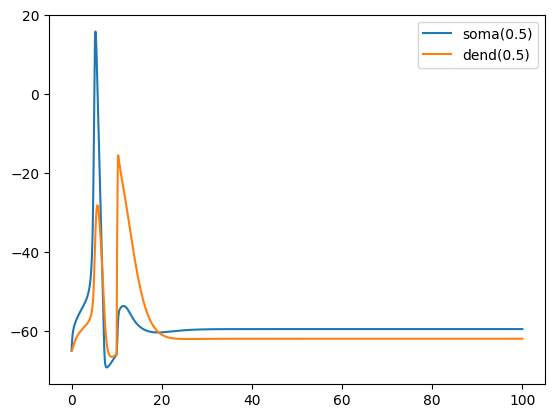

In [26]:
h.finitialize(-65 * mV)
h.continuerun(100 * ms)
plt.plot(t, soma_v, label='soma(0.5)')
plt.plot(t, dend_v, label='dend(0.5)')
plt.legend()
plt.show()

In [27]:
spike_times = [h.Vector() for nc in netcons]
for nc, spike_times_vec in zip(netcons, spike_times):
    nc.record(spike_times_vec)

h.finitialize(-65 * mV)
h.continuerun(100 * ms)

0.0

In [28]:
for i, spike_times_vec in enumerate(spike_times):
    print('cell {}: {}'.format(i, list(spike_times_vec)))

cell 0: [5.150000000100039]
cell 1: [5.150000000100039]
cell 2: [5.150000000100039]
cell 3: [5.150000000100039]
cell 4: [5.150000000100039]


RuntimeError: matplotlib does not support generators as input

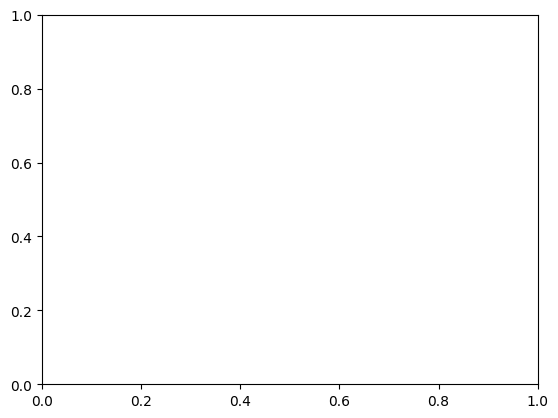

In [29]:
import matplotlib.pyplot as plt
plt.figure()

for i, spike_times_vec in enumerate(spike_times):
    plt.vlines(spike_times_vec, i + 0.5, i + 1.5)
plt.show()

In [30]:
t = h.Vector()
t.record(h._ref_t)

soma_v = h.Vector()
soma_v.record(L5PC.soma[0](0.5)._ref_v)

nexus_v = h.Vector()
nexus_v.record(L5PC.apic[36](0.9)._ref_v)

stim_current = h.Vector()
stim_current.record(stim._ref_i)

h.v_init = -80
h.tstop = 1500
h.celsius = 37
h.run()

stim = h

NameError: name 'L5PC' is not defined